1. EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv(r"C:\Users\Nayan\Desktop\project deployement\bike_rent (1)  (1).csv")

# Display the first few rows of the dataset
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


In [3]:
numerical_columns = ['yr','mnth','temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
categorical_columns = ['season','holiday','workingday','weathersit']

In [5]:
# Assuming 'df' is the original DataFrame containing your data
# First, replace '?' with NaN in both numerical and categorical columns
df[categorical_columns] = df[categorical_columns].replace('?', np.nan)
df[numerical_columns] = df[numerical_columns].replace('?', np.nan)

In [7]:
# 1. Describe the dataset

print("Dataset Information:\n")
df.info()
print("\nFirst 5 rows of the dataset:\n")
print(df.head())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17373 non-null  object
 3   yr          17378 non-null  object
 4   mnth        17378 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17378 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17374 non-null  object
 9   weathersit  17375 non-null  object
 10  temp        17368 non-null  object
 11  atemp       17373 non-null  object
 12  hum         17373 non-null  object
 13  windspeed   17374 non-null  object
 14  casual      17378 non-null  object
 15  registered  17378 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB

First 5 rows of the dataset:

   instant      dteday    s

In [9]:
# Convert columns with numerical data stored as objects
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [11]:
# 2. Clean the data
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
instant        0
dteday         0
season         6
yr             1
mnth           1
hr             0
holiday        1
weekday        0
workingday     5
weathersit     4
temp          11
atemp          6
hum            6
windspeed      5
casual         1
registered     1
cnt            0
dtype: int64


In [13]:
# Check for duplicated records
duplicated_records = df.duplicated().sum()
print("\nDuplicated Records:")
print(duplicated_records)


Duplicated Records:
0


In [15]:
# Imputation for numerical columns with mean and categorical columns with mode
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [17]:
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [19]:
# Detect outliers using Z-scores (threshold: |z| > 3)
z_scores = df[numerical_columns].apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("\nOutliers per column:")
print(outliers)


Outliers per column:
yr              0
mnth            0
temp            0
atemp           1
hum            22
windspeed     107
casual        467
registered    371
dtype: int64


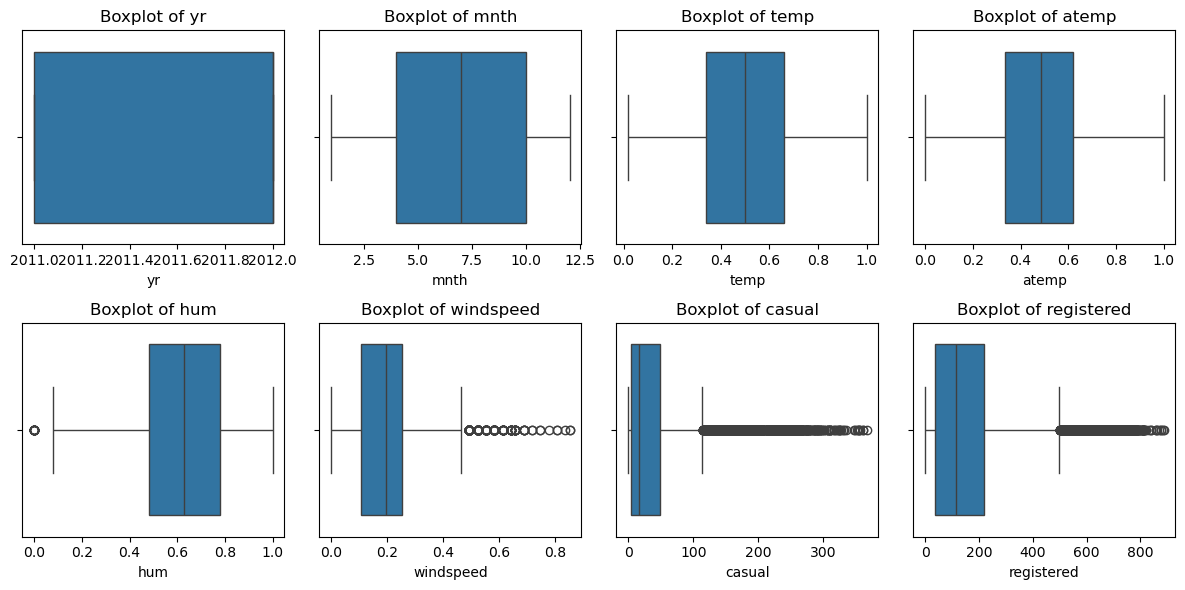

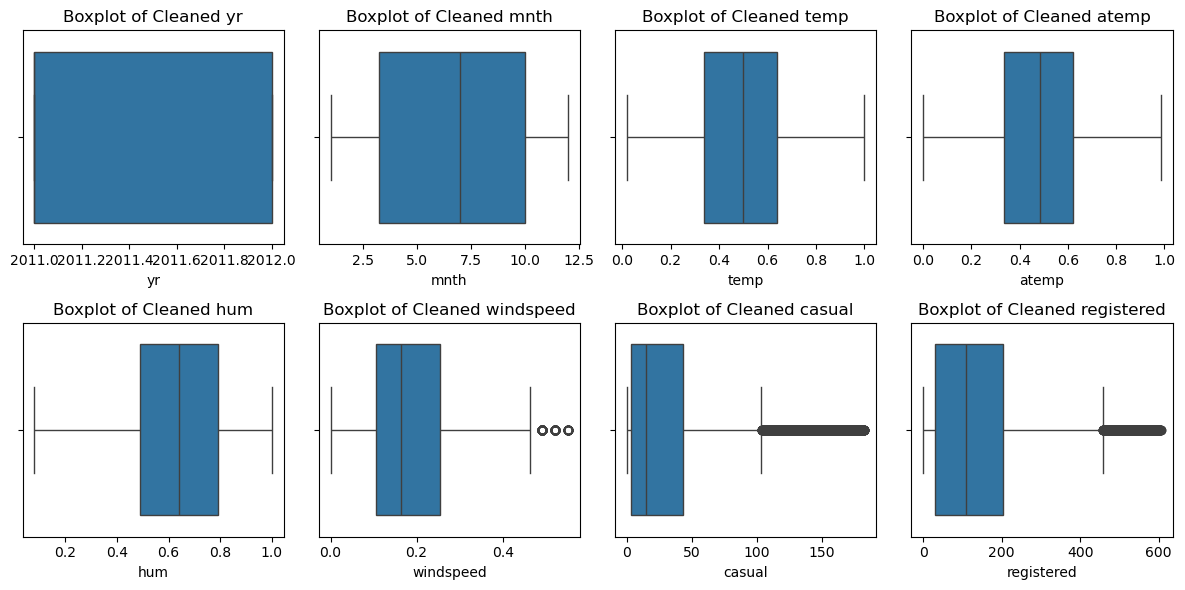

In [21]:
# Z-score calculation for detecting outliers in numerical columns
z_scores = np.abs(stats.zscore(df[numerical_columns]))

# Set a threshold to identify outliers (Z-score > 3)
outliers = (z_scores > 3).any(axis=1)

# Create a new DataFrame by removing outliers
cleaned_df = df[~outliers]

# Plotting Boxplots for numerical columns to detect outliers visually
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Plot boxplots for the cleaned data
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=cleaned_df, x=col)
    plt.title(f'Boxplot of Cleaned {col}')
plt.tight_layout()
plt.show()

In [22]:

# Optionally, save cleaned data to a new CSV file
# Save the cleaned dataset
cleaned_file_path = "C:\\Users\\madhu\\OneDrive\\Desktop\\cleaned bike_rent.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"cleaned dataset saved to: {cleaned_file_path}")

OSError: Cannot save file into a non-existent directory: 'C:\Users\madhu\OneDrive\Desktop'

In [ ]:
plt.figure(figsize=(18, 6))

# Plot for each category: season, holiday, weather, weekday

# 1st subplot: Season vs Count
plt.subplot(1, 4, 1)
sns.scatterplot(data=df, x='temp', y='cnt', hue='season')
plt.title('Scatter Plot: Season vs Count')


# 2nd subplot: Holiday vs Count
plt.subplot(1, 4, 2)
sns.scatterplot(data=df, x='hum', y='cnt', hue='season')
plt.title('Scatter Plot: Humidity vs Count')

# 3rd subplot: Weather vs Count
plt.subplot(1, 4, 3)
sns.scatterplot(data=df, x='windspeed', y='cnt', hue='season')
plt.title('Scatter Plot: windspeed vs Count')
plt.xticks(rotation=45)


# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [ ]:
# BAR PLOTS:

plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
sns.barplot(data=df, x='weekday', y='cnt', ci=None)
plt.title('Bar Plot: Count by Season')
plt.show()

plt.figure(figsize=(7,6))
plt.subplot(1, 3, 2)
sns.barplot(data=df, x='workingday', y='cnt', ci=None)
plt.title('Bar Plot: Count by Season')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18,6))
plt.subplot(1, 3, 3)
sns.barplot(data=df, x='weathersit', y='cnt', ci=None)
plt.title('Bar Plot: Count by Season')
plt.show()

In [ ]:
# LINE PLOTS:

plt.subplot(1, 3, 2)
sns.lineplot(data=df, x='hr', y='cnt', hue='weekday', ci=None)
plt.title('Line Plot: Hourly Count by Weekday')

In [ ]:
# 2. Time series analysis:

import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'dteday' column is parsed as datetime
# Handle potential format issues
df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True, errors='coerce')

# Check for any invalid datetime parsing
if df['dteday'].isnull().sum() > 0:
    print("Warning: Some dates could not be parsed. Review the 'dteday' column for inconsistencies.")
    df = df.dropna(subset=['dteday'])

# Set 'dteday' as index
df.set_index('dteday', inplace=True)

# Resample to monthly data and aggregate the counts
time_series_data = df.resample('M').sum()

# Plot time series data
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data['cnt'], marker='o', linestyle='-', color='b')
plt.title('Monthly Bike Rentals Trend')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()


In [ ]:
# 3. Heatmap of correlation matrix:

# Check for numerical columns
print("Numerical columns used for correlation:")
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)

# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# 4. Additional Informative Plots

# 1. Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], kde=True, bins=30, color='purple')
plt.title('Distribution of Total Rentals (cnt)')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Pair Plot
selected_columns = ['temp', 'hum', 'windspeed', 'cnt']
sns.pairplot(df[selected_columns], diag_kind='kde', kind='scatter', corner=True)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# 3. Seasonal Trends - Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='season', y='cnt', palette='Set2')
plt.title('Boxplot of Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()

# 4. Hourly Heatmap
# Create a pivot table for heatmap
hourly_pivot = df.pivot_table(index='hr', columns='weekday', values='cnt', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(hourly_pivot, annot=False, fmt=".0f", cmap="YlGnBu", cbar=True)
plt.title('Average Rentals by Hour and Weekday')
plt.xlabel('Weekday')
plt.ylabel('Hour of Day')
plt.show()


3. FEATURE ENGINEERING

In [30]:
# 1. Generate new features

# Ensure 'temp' column is numeric and missing values are handled
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')
df['temp_squared'] = df['temp'].fillna(0) ** 2

# Compute the interaction term, ensuring numeric columns
df['humidity_windspeed_interaction'] = (
    pd.to_numeric(df['hum'], errors='coerce').fillna(0) *
    pd.to_numeric(df['windspeed'], errors='coerce').fillna(0)
)

print("New features added successfully.")
print(df[['temp_squared', 'humidity_windspeed_interaction']].head())

New features added successfully.
   temp_squared  humidity_windspeed_interaction
0        0.0576                             0.0
1        0.0484                             0.0
2        0.0484                             0.0
3        0.0576                             0.0
4        0.0576                             0.0


In [32]:
# 2. Handle categorical variables

categorical_columns = ['season', 'weekday', 'weathersit']
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]),
                                   columns=encoder.get_feature_names_out(categorical_columns),
                                   index=df.index)
df = pd.concat([df, categorical_encoded], axis=1)
df.drop(columns=categorical_columns, inplace=True)

In [34]:
# 3. Scale numerical features

# Convert all scaled columns to numeric (will set invalid values to NaN)
scaled_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'temp_squared', 'humidity_windspeed_interaction']
df[scaled_columns] = df[scaled_columns].apply(pd.to_numeric, errors='coerce')

# Handle missing values (e.g., fill with median or drop rows)
df.dropna(subset=scaled_columns, inplace=True)  # Dropping rows with NaN in scaled columns

# Scale numerical features
scaler = StandardScaler()
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# Output the transformed DataFrame
print(df.head())

   instant      dteday      yr  mnth  hr holiday workingday      temp  \
0        1  01-01-2011  2011.0   1.0   0      No    No work -1.336038   
1        2  01-01-2011  2011.0   1.0   1      No    No work -1.439956   
2        3  01-01-2011  2011.0   1.0   2      No    No work -1.439956   
3        4  01-01-2011  2011.0   1.0   3      No    No work -1.336038   
4        5  01-01-2011  2011.0   1.0   4      No    No work -1.336038   

      atemp       hum  ...  season_winter  weekday_1  weekday_2  weekday_3  \
0 -1.094047  0.947601  ...            0.0        0.0        0.0        0.0   
1 -1.182525  0.895760  ...            0.0        0.0        0.0        0.0   
2 -1.182525  0.000000  ...            0.0        0.0        0.0        0.0   
3 -1.094047  0.636559  ...            0.0        0.0        0.0        0.0   
4 -1.094047  0.636559  ...            0.0        0.0        0.0        0.0   

   weekday_4  weekday_5  weekday_6  weathersit_Heavy Rain  \
0        0.0        0.0        

In [36]:

# Ensure 'dteday' is parsed as datetime
df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True, errors='coerce')

# Generate the 'weekday' column if it doesn't exist
if 'weekday' not in df.columns:
    df['weekday'] = df['dteday'].dt.weekday  # Extract weekday from 'dteday'

# Ensure 'temp', 'hum', and 'windspeed' columns are numeric
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')
df['hum'] = pd.to_numeric(df['hum'], errors='coerce')
df['windspeed'] = pd.to_numeric(df['windspeed'], errors='coerce')

# 1. Peak Hour Indicator
df['is_peak_hour'] = df['hr'].apply(lambda x: 1 if 7 <= x <= 9 or 17 <= x <= 19 else 0)

# 2. Weekend Indicator
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x in [5, 6] else 0)

# 3. Temperature Range Categories
def categorize_temperature(temp):
    if pd.isna(temp):
        return 'unknown'
    elif temp < 0.3:  # Assuming normalized temperatures
        return 'cold'
    elif 0.3 <= temp <= 0.6:
        return 'moderate'
    else:
        return 'hot'

df['temp_category'] = df['temp'].apply(categorize_temperature)

# 4. Daytime/Nighttime Indicator
df['is_daytime'] = df['hr'].apply(lambda x: 1 if 6 <= x <= 18 else 0)

# 5. Comfort Level (based on humidity and windspeed)
def comfort_level(hum, windspeed):
    if pd.isna(hum) or pd.isna(windspeed):
        return 'unknown'
    elif hum >= 0.7 and windspeed > 0.2:
        return 'uncomfortable'
    elif hum <= 0.7 and windspeed <= 0.2:
        return 'comfortable'
    else:
        return 'neutral'

df['comfort_level'] = df.apply(
    lambda row: comfort_level(row['hum'], row['windspeed']), axis=1
)

# Display the first few rows of the updated dataset with new features
print("New Domain-Knowledge-Based Features:")
print(df[['hr', 'weekday', 'is_peak_hour', 'is_weekend', 'temp_category', 'is_daytime', 'comfort_level']].head())



New Domain-Knowledge-Based Features:
   hr  weekday  is_peak_hour  is_weekend temp_category  is_daytime  \
0   0        5             0           1          cold           0   
1   1        5             0           1          cold           0   
2   2        5             0           1          cold           0   
3   3        5             0           1          cold           0   
4   4        5             0           1          cold           0   

  comfort_level  
0       neutral  
1       neutral  
2   comfortable  
3   comfortable  
4   comfortable  


In [38]:
# Preprocessing
# Handle missing or invalid values
# Ensure 'data' is defined before preprocessing

data = pd.read_csv(r"C:\Users\Nayan\Desktop\project deployement\cleaned bike_rent (3).csv")
data.dropna(inplace=True)


In [40]:
# Convert appropriate columns to numeric

data['temp'] = pd.to_numeric(data['temp'], errors='coerce')
data['atemp'] = pd.to_numeric(data['atemp'], errors='coerce')
data['hum'] = pd.to_numeric(data['hum'], errors='coerce')
data['windspeed'] = pd.to_numeric(data['windspeed'], errors='coerce')

In [42]:
# Encode categorical variables

data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit'], drop_first=True)

In [44]:
# Feature selection

X = data.drop(columns=['cnt', 'instant', 'dteday', 'casual', 'registered'])
y = data['cnt']

In [46]:
# 2. Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Initialize models
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


Decision Tree:
  RMSE: 60.1735
  MAE: 34.6082
  R2: 0.8857
Random Forest:
  RMSE: 42.3773
  MAE: 25.1790
  R2: 0.9433
Gradient Boosting:
  RMSE: 67.7629
  MAE: 46.4854
  R2: 0.8550


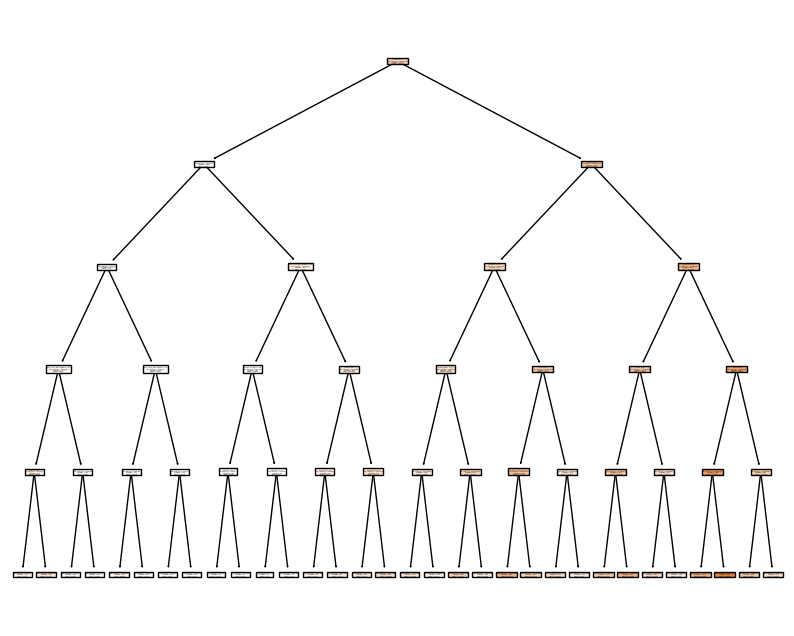

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_

{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [49]:
#Training the model
dectree=DecisionTreeRegressor(max_depth=5,min_samples_leaf=3,min_samples_split=5,random_state=100)
dt_model=dectree.fit(X_train,y_train)

plt.figure(figsize=(10,8))
plot_tree(dt_model,filled=True,feature_names=X_train.columns)
plt.show()

#finding the best parameter using grid search
params={'max_depth':range(2,10),'min_samples_split':range(2,10),'min_samples_leaf':range(2,10)}
grid=GridSearchCV(dectree,params,verbose=2)

grid.fit(X_train,y_train)

grid.best_params_


In [59]:
#Building decision tree model with best params
dectree2=DecisionTreeRegressor(max_depth=9,min_samples_leaf=4,min_samples_split=2,random_state=100)
dt_model2=dectree2.fit(X_train,y_train)

#RMSE,MAE or R-Squared of best parameteres model
y_pred=dt_model.predict(X_test)
rms_dt=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rms_dt)
mae_dt=mean_absolute_error(y_test,y_pred)
print("MAE:",mae_dt)
r2_dt=r2_score(y_test,y_pred)
print("R:",r2_dt)

RMSE: 105.55366002148904
MAE: 70.20971211920539
R: 0.6481468367630305


RANDOM FOREST

In [63]:
#using grid search to find best parameters
params_rand={'n_estimators':range(50,100),'bootstrap':[True,False]}
grid_sch_rand=GridSearchCV(rand_for,params_rand,verbose=2)

In [65]:
grid_sch_rand.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ....................bootstrap=True, n_estimators=50; total time=   0.7s
[CV] END ....................bootstrap=True, n_estimators=50; total time=   0.7s
[CV] END ....................bootstrap=True, n_estimators=50; total time=   0.5s
[CV] END ....................bootstrap=True, n_estimators=50; total time=   0.5s
[CV] END ....................bootstrap=True, n_estimators=50; total time=   0.6s
[CV] END ....................bootstrap=True, n_estimators=51; total time=   0.6s
[CV] END ....................bootstrap=True, n_estimators=51; total time=   0.6s
[CV] END ....................bootstrap=True, n_estimators=51; total time=   0.5s
[CV] END ....................bootstrap=True, n_estimators=51; total time=   0.5s
[CV] END ....................bootstrap=True, n_estimators=51; total time=   0.5s
[CV] END ....................bootstrap=True, n_estimators=52; total time=   0.6s
[CV] END ....................bootstrap=True, n

GridSearchCV(estimator=RandomForestRegressor(max_depth=5, min_samples_leaf=3,
                                             min_samples_split=5,
                                             n_estimators=87,
                                             random_state=100),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': range(50, 100)},
             verbose=2)

In [67]:
grid_sch_rand.best_params_

{'bootstrap': True, 'n_estimators': 87}

In [69]:
rand_for=RandomForestRegressor(n_estimators=87,max_depth=5,min_samples_leaf=3,min_samples_split=5,random_state=100,bootstrap=True)
rand_model=rand_for.fit(X_train,y_train)
#RMSE,MAE or R-Squared
y_pred_rand=rand_model.predict(X_test)
rms_rand=np.sqrt(mean_squared_error(y_test,y_pred_rand))
print("RMSE:",rms_rand)
mae_rand=mean_absolute_error(y_test,y_pred_rand)
print("MAE:",mae_rand)
r2_rand=r2_score(y_test,y_pred_rand)
print("R:",r2_rand)

RMSE: 103.90934321925693
MAE: 68.49810185939404
R: 0.6590238006532239


GRADIENT BOOSTING REGRESSION

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [74]:
gb_model=GradientBoostingRegressor(n_estimators=50,learning_rate=0.01,max_depth=5)
gb_model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=50)

In [76]:
#RMSE,MAE or R-Squared
y_pred_gb=gb_model.predict(X_test)
rms_gb=np.sqrt(mean_squared_error(y_test,y_pred_gb))
print("RMSE:",rms_gb)
mae_gb=mean_absolute_error(y_test,y_pred_gb)
print("MAE:",mae_gb)
r2_gb=r2_score(y_test,y_pred_gb)
print("R:",r2_gb)

RMSE: 134.87465547686583
MAE: 102.97921358383496
R: 0.42551914147852676


In [78]:
gb_param_grid={'n_estimators':[50,100,150,200,250,300],'learning_rate':[0.01,0.1,0.2],'max_depth':[3,5,7]}
gb_random_search=RandomizedSearchCV(estimator=gb_model,param_distributions=gb_param_grid,n_iter=10,cv=3,verbose=2)

In [80]:
gb_random_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=300; total time=   7.6s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=300; total time=   7.4s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=300; total time=   8.0s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   1.9s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   1.8s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   2.0s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=300; total time=   6.9s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=300; total time=   6.8s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=300; total time=   6.7s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   2.2s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   2.0s
[CV] END ...learning_rate=0.2, max_depth=5, n_es

RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=5,
                                                       n_estimators=50),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   verbose=2)

In [87]:
#building the model with best parameters
gb_model2=GradientBoostingRegressor(n_estimators=50,learning_rate=0.01,max_depth=5)
gb_model2.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=50)

In [89]:
#RMSE,MAE or R-Squared  value of best params model
y_pred_gb2=gb_model2.predict(X_test)
rms_gb2=np.sqrt(mean_squared_error(y_test,y_pred_gb2))
print("RMSE:",rms_gb2)
mae_gb2=mean_absolute_error(y_test,y_pred_gb2)
print("MAE:",mae_gb2)
r2_gb2=r2_score(y_test,y_pred_gb2)
print("R:",r2_gb2)

RMSE: 134.87467507871975
MAE: 102.97944986863193
R: 0.42551897449547627


In [91]:
gb_best_params=gb_random_search.best_params_
gb_best_score=gb_random_search.best_score_
print('gb_best_params=',gb_best_params)
print('gb_best_score=',gb_best_score)

gb_best_params= {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.1}
gb_best_score= 0.9465620201667048


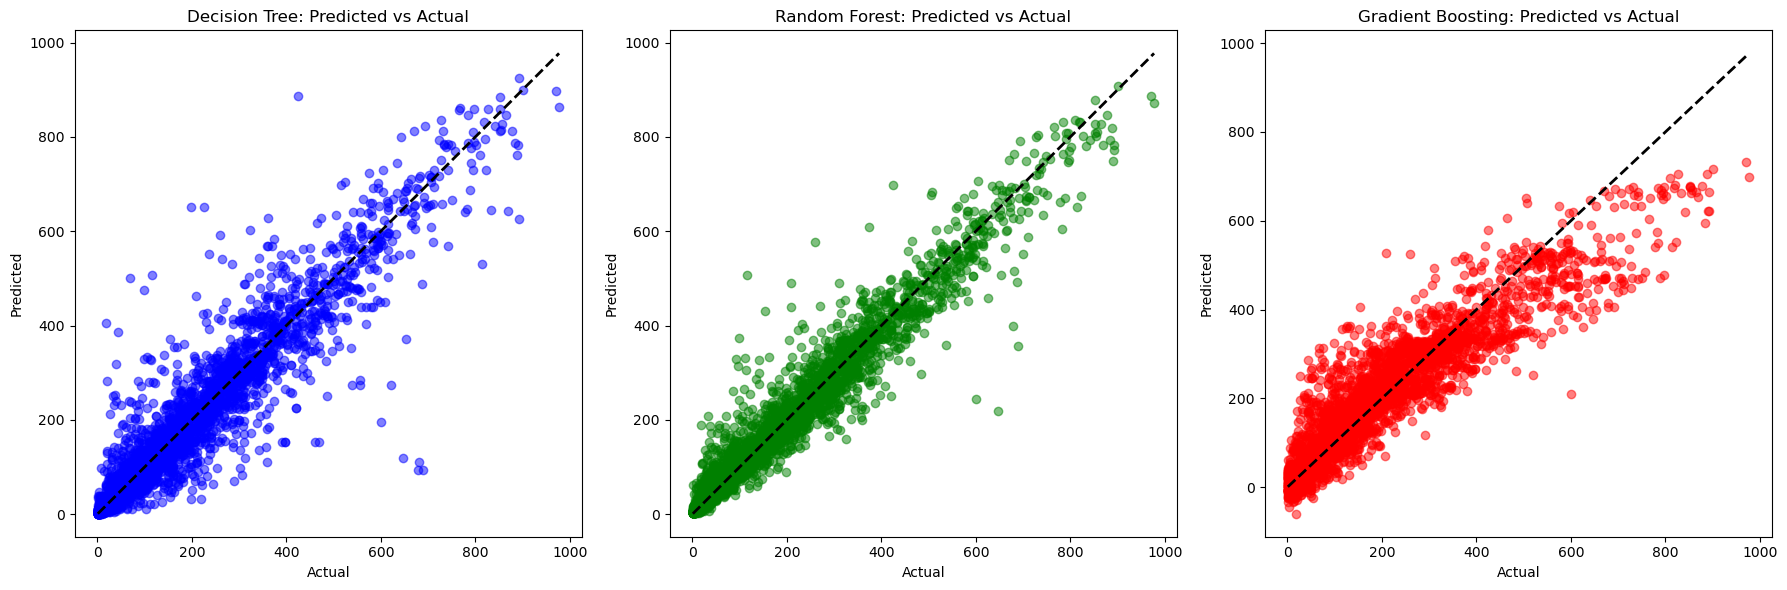

In [93]:
# First, train the models and make predictions
# Train models
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

# Fit models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# Plot Predicted vs Actual values for each model
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Decision Tree Plot
axs[0].scatter(y_test, y_pred_dt, color='blue', alpha=0.5)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[0].set_title('Decision Tree: Predicted vs Actual')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

# Random Forest Plot
axs[1].scatter(y_test, y_pred_rf, color='green', alpha=0.5)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1].set_title('Random Forest: Predicted vs Actual')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')

# Gradient Boosting Plot
axs[2].scatter(y_test, y_pred_gb, color='red', alpha=0.5)
axs[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[2].set_title('Gradient Boosting: Predicted vs Actual')
axs[2].set_xlabel('Actual')
axs[2].set_ylabel('Predicted')

plt.tight_layout()
plt.show()


In [95]:
import pickle

In [97]:
pickle.dump(rand_model,open('rand_model.pkl','wb'))